## ข้อ 1

In [94]:
from sklearn.datasets import load_iris
data=load_iris()
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [95]:
print(data.data.shape)

(150, 4)


## ข้อ 2

In [96]:
from sklearn.preprocessing import OneHotEncoder
print(data.target_names)

['setosa' 'versicolor' 'virginica']


## ข้อ 3

In [97]:
encoder=OneHotEncoder(sparse_output=False)
y=data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [98]:
encoder= encoder.fit_transform(y.reshape(-1,1))
y=encoder
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [99]:
print(y.shape)

(150, 3)


## ข้อ 4

In [100]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(data.data,y,test_size=0.25,random_state=42)

## ข้อ 5

In [101]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.005,solver='sgd',activation='logistic', max_iter=1000)
MLP.fit(xTrain, yTrain)

C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(50,)"
,activation,'logistic'
,solver,'sgd'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.005
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


## ข้อ 6

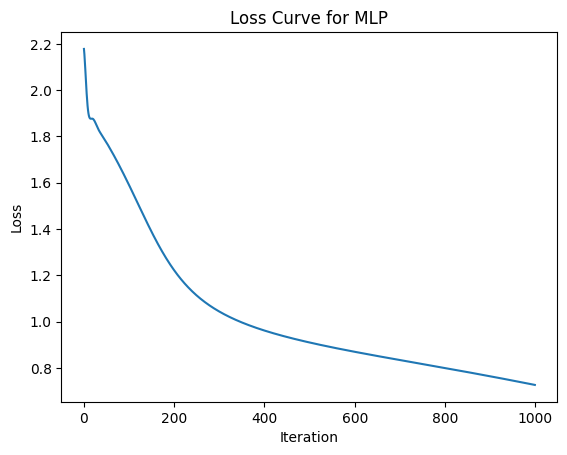

In [102]:
import matplotlib.pyplot as plt

loss_values =MLP.loss_curve_

plt.plot(loss_values)
plt.title('Loss Curve for MLP')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [112]:
from sklearn.metrics import r2_score
yPred = MLP.predict(xTest)
r2_mlp = r2_score(yTest, yPred)
r2_mlp

0.530864197530864

In [103]:
MLP.loss_

np.float64(0.7267749655847192)

## ข้อ 7

In [104]:
print("acc:", MLP.score(xTest, yTest))

acc: 0.7105263157894737


## ข้อ 8

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
parameter={'hidden_layer_sizes': [(5,),(20,),(5,5),(5,20),(5,20,5)],
           'activation': ['logistic','relu'],
           'solver': ['sgd','adam'],
           'learning_rate_init': [0.0001,0.001,0.005]}

In [107]:
grid = GridSearchCV(MLP, parameter, cv=3)
grid.fit(xTrain, yTrain)

C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warning

,estimator,MLPClassifier... solver='sgd')
,param_grid,"{'activation': ['logistic', 'relu'], 'hidden_layer_sizes': [(5,), (20,), ...], 'learning_rate_init': [0.0001, 0.001, ...], 'solver': ['sgd', 'adam']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,hidden_layer_sizes,"(5, ...)"


In [108]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (5, 20), 'learning_rate_init': 0.001, 'solver': 'adam'}


## ข้อ 9

In [109]:
print("acc:", grid.score(xTest, yTest))

acc: 1.0


## ข้อ 10

In [110]:
grid=grid.best_estimator_
print(grid.coefs_[0])

[[ 0.73475661  0.59118231  0.4009927  -0.28834699 -0.45468802]
 [ 1.04520433  0.069792    1.32544363  0.18922047  0.48524679]
 [-0.56015851  0.64657213 -0.22898123  1.20608561  0.34539464]
 [-1.18523254  1.0796309  -1.15527594  0.50215406  0.88528988]]


In [111]:
print(grid.intercepts_[0])

[ 0.11584412  0.53059979  1.17376681 -0.25887987 -0.44252496]


In [114]:
from sklearn.metrics import r2_score
yPred = grid.predict(xTest)
r2_mlp = r2_score(yTest, yPred)
r2_mlp

1.0

## ข้อ 11

In [107]:
print(grid.coefs_[1])

[[-0.74396879  0.80858009  0.17257644]
 [ 0.61214413  0.52412098 -0.86732967]
 [-0.21950359  0.32214748 -0.66325759]
 [-0.93302452  1.09152013 -0.0643267 ]
 [-0.42345245 -1.01737837  0.75364848]
 [-0.85944197 -0.63114884  0.75913584]
 [-0.2339678  -0.95349444 -0.03031167]
 [-0.87037845  0.88212733  0.14814191]
 [ 0.74905907 -1.2373973  -0.26182452]
 [ 0.54847913  0.62534747 -0.66582039]
 [ 0.78716018  0.66258299 -0.82206724]
 [ 0.90095955 -1.1454044  -0.46975759]
 [ 0.64154225 -1.23050778 -0.21915158]
 [-1.07844387 -0.95919434  0.73336581]
 [ 0.71035917 -0.93079907 -0.27673528]
 [ 0.63060031 -1.0417217  -0.6126795 ]
 [ 0.46536066 -0.90301829 -0.44894567]
 [-0.86579036 -1.29713058  0.40960862]
 [ 0.58409486  0.84383289 -0.8797271 ]
 [-1.04528787 -0.70037615  0.18150391]]


In [108]:
print(grid.intercepts_[1])

[-0.51855611 -0.54623098 -0.0086629 ]


## ข้อ 12

In [77]:
import pandas as pd
df=pd.read_csv('bike_rental.csv')

## ข้อ 13

In [78]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df

,instant,date,season,temp,humi,windspeed,casual,registered
0,1,2011-01-01,1,34.417,8.058,1.604,331,654
1,2,2011-01-02,1,36.348,6.961,2.485,131,670
2,3,2011-01-03,1,19.636,4.373,2.483,120,1229
3,4,2011-01-04,1,20.000,5.904,1.603,108,1454
4,5,2011-01-05,1,22.696,4.370,1.869,82,1518
...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,25.417,6.529,3.501,247,1867
727,728,2012-12-28,1,25.333,5.900,1.555,644,2451
728,729,2012-12-29,1,25.333,7.529,1.244,159,1182
729,730,2012-12-30,1,25.583,4.833,3.508,364,1432


In [79]:
df['weekday'] = df['date'].dt.dayofweek 
df['working_day'] = df['weekday'].apply(lambda x: 0 if x in [0, 6] else 1)
df['month'] = df['date'].dt.month - 1
df['lag_feature_1'] = df['casual'].shift(1) + df['registered'].shift(1)
df['lag_feature_2'] = df['casual'].shift(2) + df['registered'].shift(2)
df['lag_feature_3'] = df['casual'].shift(3) + df['registered'].shift(3)
df

,instant,date,season,temp,humi,windspeed,casual,registered,weekday,working_day,month,lag_feature_1,lag_feature_2,lag_feature_3
0,1,2011-01-01,1,34.417,8.058,1.604,331,654,5,1,0,NaN,NaN,NaN
1,2,2011-01-02,1,36.348,6.961,2.485,131,670,6,0,0,985.0,NaN,NaN
2,3,2011-01-03,1,19.636,4.373,2.483,120,1229,0,0,0,801.0,985.0,NaN
3,4,2011-01-04,1,20.000,5.904,1.603,108,1454,1,1,0,1349.0,801.0,985.0
4,5,2011-01-05,1,22.696,4.370,1.869,82,1518,2,1,0,1562.0,1349.0,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,25.417,6.529,3.501,247,1867,3,1,11,441.0,1013.0,920.0
727,728,2012-12-28,1,25.333,5.900,1.555,644,2451,4,1,11,2114.0,441.0,1013.0
728,729,2012-12-29,1,25.333,7.529,1.244,159,1182,5,1,11,3095.0,2114.0,441.0
729,730,2012-12-30,1,25.583,4.833,3.508,364,1432,6,0,11,1341.0,3095.0,2114.0


In [80]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,instant,date,season,temp,humi,windspeed,casual,registered,weekday,working_day,month,lag_feature_1,lag_feature_2,lag_feature_3
0,4,2011-01-04,1,20.000,5.904,1.603,108,1454,1,1,0,1349.0,801.0,985.0
1,5,2011-01-05,1,22.696,4.370,1.869,82,1518,2,1,0,1562.0,1349.0,801.0
2,6,2011-01-06,1,20.435,5.183,0.896,88,1518,3,1,0,1600.0,1562.0,1349.0
3,7,2011-01-07,1,19.652,4.987,1.687,148,1362,4,1,0,1606.0,1600.0,1562.0
4,8,2011-01-08,1,16.500,5.358,2.668,68,891,5,1,0,1510.0,1606.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,727,2012-12-27,1,25.417,6.529,3.501,247,1867,3,1,11,441.0,1013.0,920.0
724,728,2012-12-28,1,25.333,5.900,1.555,644,2451,4,1,11,2114.0,441.0,1013.0
725,729,2012-12-29,1,25.333,7.529,1.244,159,1182,5,1,11,3095.0,2114.0,441.0
726,730,2012-12-30,1,25.583,4.833,3.508,364,1432,6,0,11,1341.0,3095.0,2114.0


## ข้อ 14

In [81]:
df['cnt'] = df['casual'].shift(-1) + df['registered'].shift(-1)

## ข้อ 15

In [82]:
y=df['cnt']
x=df.drop(columns=['cnt','date'])
xTrain=x[:540]
yTrain=y[:540]

xTest=x[540:]
yTest=y[540:]

## ข้อ 16

In [37]:
parameter={'hidden_layer_sizes': [(50,),(10,10),(10,50),(10,50,5)],
           'activation': ['logistic','identity','relu'],
           'solver': ['sgd','adam'],
           'learning_rate_init': [0.0001,0.001,0.005],
           'n_iter_no_change': [10,50],}

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [39]:
df.dtypes

instant                   int64
date             datetime64[ns]
season                    int64
temp                    float64
humi                    float64
windspeed               float64
casual                    int64
registered                int64
weekday                   int32
working_day               int64
month                     int32
lag_feature_1           float64
lag_feature_2           float64
lag_feature_3           float64
cnt                     float64
dtype: object

In [40]:
grid = GridSearchCV(estimator=MLPRegressor(), param_grid=parameter, cv=5, return_train_score=True)
grid.fit(xTrain, yTrain)

C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Mrkit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

,estimator,MLPRegressor()
,param_grid,"{'activation': ['logistic', 'identity', ...], 'hidden_layer_sizes': [(50,), (10, ...), ...], 'learning_rate_init': [0.0001, 0.001, ...], 'n_iter_no_change': [10, 50], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,loss,'squared_error'


## ข้อ 17

In [83]:
import matplotlib.pyplot as plt
best_mlp = grid.best_estimator_

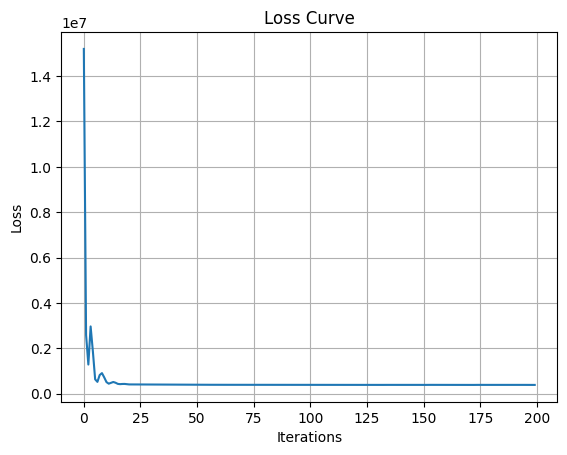

In [46]:
plt.plot(best_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## ข้อ 18

In [88]:
xTest=xTest.dropna()
yTest=yTest.dropna()
xTest = xTest.iloc[:-1]

In [90]:
xTest

,instant,season,temp,humi,windspeed,casual,registered,weekday,working_day,month,lag_feature_1,lag_feature_2,lag_feature_3
540,544,3,69.750,3.600,2.718,1077,6258,2,1,5,7442.0,6779.0,6891.0
541,545,3,74.917,4.225,1.717,921,5958,3,1,5,7335.0,7442.0,6779.0
542,546,3,83.417,4.888,1.654,829,4634,4,1,5,6879.0,7335.0,7442.0
543,547,3,76.500,6.013,1.611,1455,4232,5,1,5,5463.0,6879.0,7335.0
544,548,3,81.583,5.188,1.685,1421,4110,6,0,6,5687.0,5463.0,6879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,726,1,24.333,8.233,3.165,9,432,2,1,11,1013.0,920.0,1787.0
723,727,1,25.417,6.529,3.501,247,1867,3,1,11,441.0,1013.0,920.0
724,728,1,25.333,5.900,1.555,644,2451,4,1,11,2114.0,441.0,1013.0
725,729,1,25.333,7.529,1.244,159,1182,5,1,11,3095.0,2114.0,441.0


In [92]:
from sklearn.metrics import r2_score
yPred = best_mlp.predict(xTest)
r2_mlp = r2_score(yTest, yPred)
r2_mlp

0.5639891349058199

## ข้อ 19

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(yTest, yPred)
mae = mean_absolute_error(yTest, yPred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 1303289.02
Mean Absolute Error: 803.66
